# import modules....

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.metrics import roc_auc_score

# File system manangement
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
pip install mlflow

import mlflow
from mlflow.models import infer_signature

SyntaxError: invalid syntax (<ipython-input-4-308bd41014da>, line 1)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = 'C:/Users/erwan/openclassroomsRessources/projet7/Projet+Mise+en+prod+-+home-credit-default-risk/'
#path = "/content/drive/MyDrive/openclassroomsRessources/projet7/home_credit_default_risk/"

#fonctions communes

In [25]:
def getInfosOnColumns(dataframe):
  EDA = pd.DataFrame()
  eda = pd.DataFrame()
  df = dataframe.copy()
  for c in df.columns:
      eda['Columns'] = [c]
      eda['Types'] = df[c].dtypes
      eda['Values'] = [df[c].unique()]
      eda['Uniques'] = len(df[c].unique())
      eda['Uniques(no nulls)'] = int(df[c].nunique())
      eda['Missing(n)'] = df[c].isnull().sum()
      eda['Missing(%)'] = (df[c].isnull().sum()/ len(df)).round(3)*100
      EDA = pd.concat([EDA,eda])
  return EDA


def boxPlotsNumColumns(dataframe):
    df1=dataframe.select_dtypes(exclude=['object'])
    for column in df1:
            plt.figure(figsize=(17,1))
            sns.boxplot(data=df1, x=column)

# Import dataset

In [7]:
# List files available
print(os.listdir(path))
#os.listdir(os.curdir)

['installments_payments.csv', 'credit_card_balance.csv', 'bureau.csv', 'sample_submission.csv', 'POS_CASH_balance.csv', 'HomeCredit_columns_description.csv', 'application_train.csv', 'previous_application.csv', 'application_test.csv', 'bureau_balance.csv']


## fichiers principaux application_train et application_test

In [16]:
# Training data
app_train = pd.read_csv(path + 'application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
app_train_4tests = app_train[(app_train['SK_ID_CURR']>100001) & (app_train['SK_ID_CURR']<100005)]
app_train_4tests.to_csv("application_train_4tests.csv")
#app_train_4deployment =

In [ ]:
app_train_4deployment = app_train[(app_train['SK_ID_CURR']>100000) & (app_train['SK_ID_CURR']<100101)]
app_train_4deployment.to_csv("application_train_production.csv")


In [ ]:
# Testing data features
app_test = pd.read_csv(path + 'application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


pas de variable TARGET dans données test -> On ne pourra pas les utiliser pour les tests

In [ ]:
# Testing data features
app_test = pd.read_csv(path + 'application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

In [ ]:
pd.set_option('display.max_rows', None)
getInfosOnColumns(app_train)

,Columns,Types,Values,Uniques,Uniques(no nulls),Missing(n),Missing(%)
0,SK_ID_CURR,int64,"[100002, 100003, 100004, 100006, 100007, 10000...",307511,307511,0,0.0
0,TARGET,int64,"[1, 0]",2,2,0,0.0
0,NAME_CONTRACT_TYPE,object,"[Cash loans, Revolving loans]",2,2,0,0.0
0,CODE_GENDER,object,"[M, F, XNA]",3,3,0,0.0
0,FLAG_OWN_CAR,object,"[N, Y]",2,2,0,0.0
0,FLAG_OWN_REALTY,object,"[Y, N]",2,2,0,0.0
0,CNT_CHILDREN,int64,"[0, 1, 2, 3, 4, 7, 5, 6, 8, 9, 11, 12, 10, 19,...",15,15,0,0.0
0,AMT_INCOME_TOTAL,float64,"[202500.0, 270000.0, 67500.0, 135000.0, 121500...",2548,2548,0,0.0
0,AMT_CREDIT,float64,"[406597.5, 1293502.5, 135000.0, 312682.5, 5130...",5603,5603,0,0.0
0,AMT_ANNUITY,float64,"[24700.5, 35698.5, 6750.0, 29686.5, 21865.5, 2...",13673,13672,12,0.0


# Première analyse detaillée

## Analyse exploratoire fichier principal

https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook

### Analyse TARGET

In [32]:
app_train['TARGET'].value_counts(normalize = True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

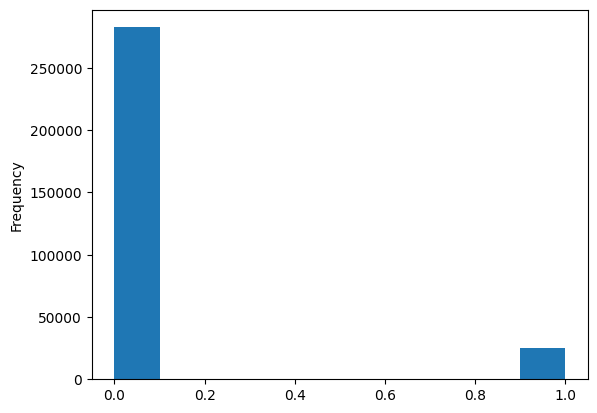

In [30]:
app_train['TARGET'].astype(int).plot.hist();
#plt.hist(app_train['TARGET'].astype(int))
#plt.xlabel('valeurs')
#plt.yticks(range(1,10))
#plt.title('')
#plt.show()
# -> problème de classification déséquilibré
# = 1 quand prêt non remboursé (très minoritaire)

### Valeurs manquantes

In [ ]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


### Types des colonnes - encodage des variables catégorielles

In [ ]:
#app_train.info()

# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [ ]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [ ]:
#If we only have two unique values for a categorical variable (such as Male/Female), then label encoding is fine
#, but for more than 2 unique categories, one-hot encoding is the safe option.

#si trop de nouvelles colonnes on peut faire une pca après one-hot encoding

In [ ]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [ ]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [ ]:
#alignement des colonnes test et train car le one-hot encoding (get-dummies)
# a créé plus de variables sur la partie train que test (plus de catégories)

train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


### Gestion des outliers

### DAYS_BIRTH

In [ ]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

### DAYS_EMPLOYED

In [ ]:
app_train['DAYS_EMPLOYED'].describe()
# -> max très élevée > 1000 ans!

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

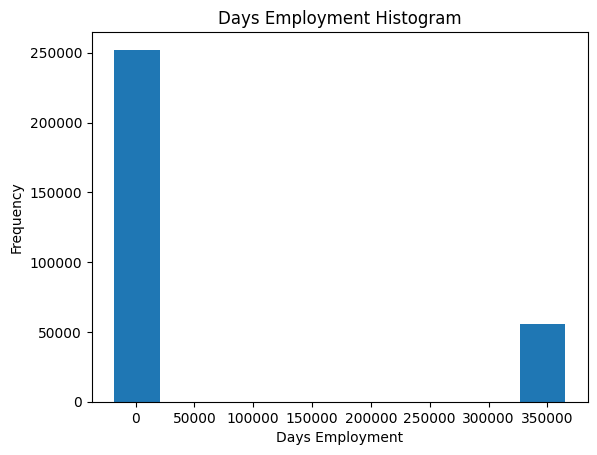

In [ ]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [ ]:
anom = app_train[app_train['DAYS_EMPLOYED'] >= 300000] #  == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] <= 300000] # != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


One of the safest approaches is just to set the anomalies to a missing value and then have them filled in (using Imputation) before machine learning. In this case, since all the anomalies have the exact same value, we want to fill them in with the same value in case all of these loans share something in common. The anomalous values seem to have some importance, so we want to tell the machine learning model if we did in fact fill in these values. As a solution, we will fill in the anomalous values with not a number (np.nan) and then create a new boolean column indicating whether or not the value was anomalous.

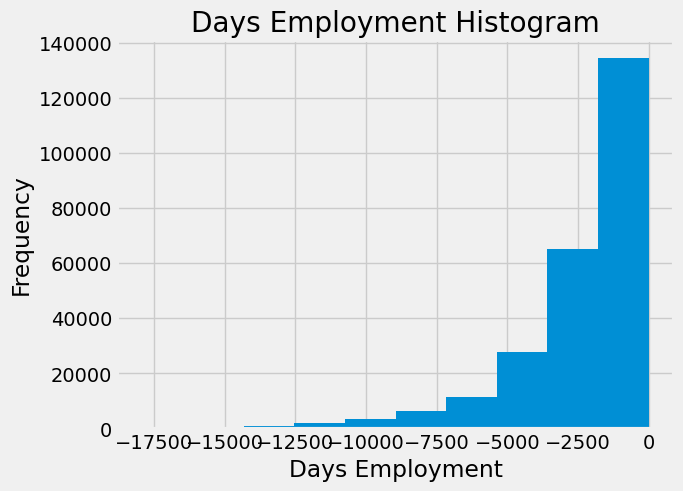

In [ ]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

As an extremely important note, anything we do to the training data we also have to do to the testing data. Let's make sure to create the new column and fill in the existing column with np.nan in the testing data.

In [ ]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


In [ ]:
pd.set_option('display.max_columns', None)
app_train.describe()
#pas d'autres anomalies détectées

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,252137.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307511.000000
mean,278180.518577,0.095213,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,-2384.169325,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.04

### Correlations

Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

.00-.19 “very weak”
.20-.39 “weak”
.40-.59 “moderate”
.60-.79 “strong”
.80-1.0 “very strong”

In [ ]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

Let's take a look at some of more significant correlations: the DAYS_BIRTH is the most positive correlation. (except for TARGET because the correlation of a variable with itself is always 1!) Looking at the documentation, DAYS_BIRTH is the age in days of the client at the time of the loan in negative days (for whatever reason!). The correlation is positive, but the value of this feature is actually negative, meaning that as the client gets older, they are less likely to default on their loan (ie the target == 0). That's a little confusing, so we will take the absolute value of the feature and then the correlation will be negative.

### Effect of Age on Repayment

In [ ]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982709

As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often.

Let's start looking at this variable. First, we can make a histogram of the age. We will put the x axis in years to make the plot a little more understandable.

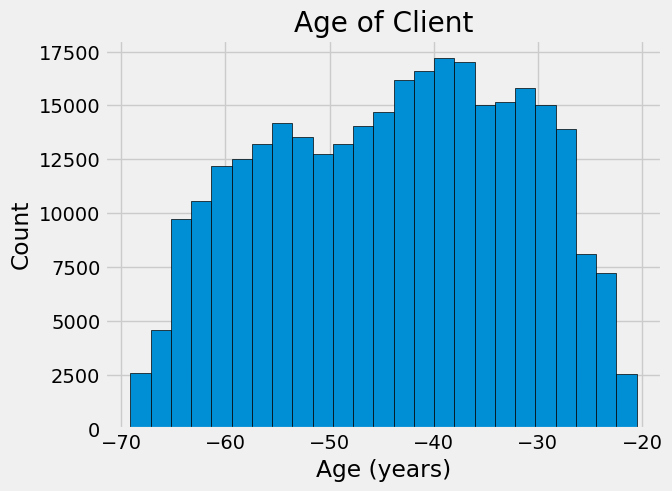

In [ ]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

By itself, the distribution of age does not tell us much other than that there are no outliers as all the ages are reasonable. To visualize the effect of the age on the target, we will next make a kernel density estimation plot (KDE) colored by the value of the target. A kernel density estimate plot shows the distribution of a single variable and can be thought of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels to develop a single smooth curve). We will use the seaborn kdeplot for this graph.

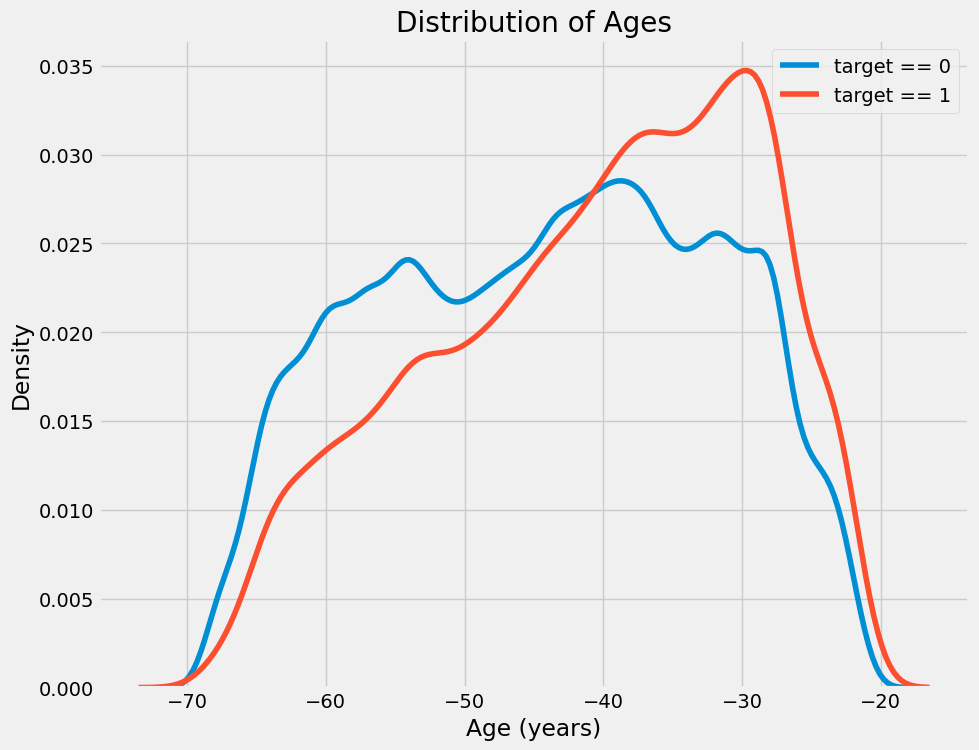

In [ ]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages'); plt.legend()

The target == 1 curve skews towards the younger end of the range. Although this is not a significant correlation (-0.07 correlation coefficient), this variable is likely going to be useful in a machine learning model because it does affect the target. Let's look at this relationship in another way: average failure to repay loans by age bracket.

To make this graph, first we cut the age category into bins of 5 years each. Then, for each bin, we calculate the average value of the target, which tells us the ratio of loans that were not repaid in each age category.

In [ ]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [ ]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


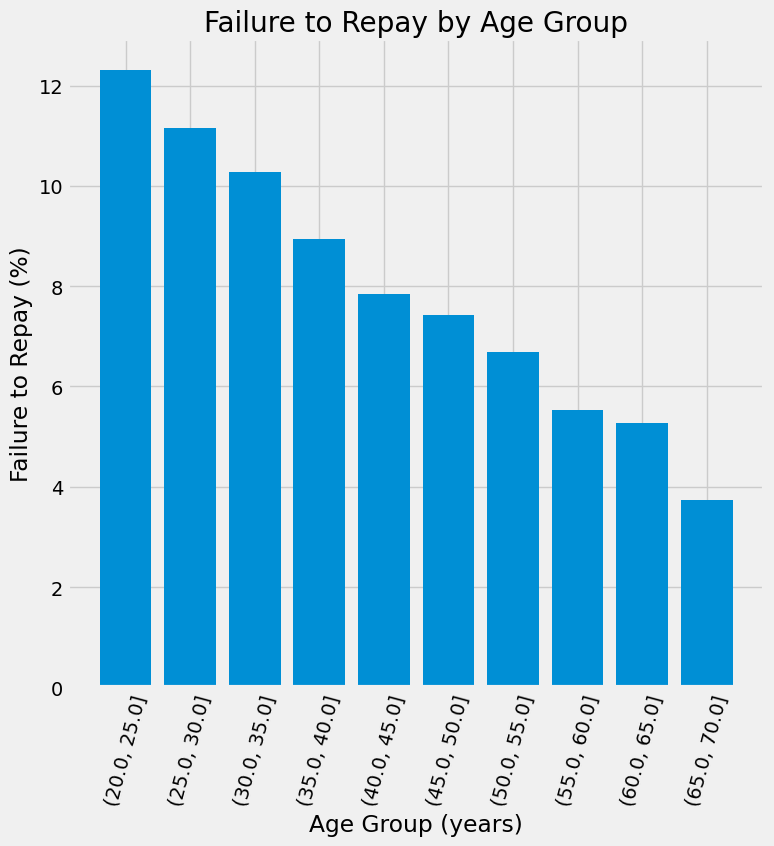

In [ ]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

There is a clear trend: younger applicants are more likely to not repay the loan! The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group.

### Exterior Sources

The 3 variables with the strongest negative correlations with the target are EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3. According to the documentation, these features represent a "normalized score from external data source". I'm not sure what this exactly means, but it may be a cumulative sort of credit rating made using numerous sources of data.

Let's take a look at these variables.

First, we can show the correlations of the EXT_SOURCE features with the target and with each other.

In [ ]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


In [ ]:
pip install seaborn --upgrade

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---------------- ----------------------- 122.9/294.9 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
Note: you may need to restart the kernel to use updated packages.


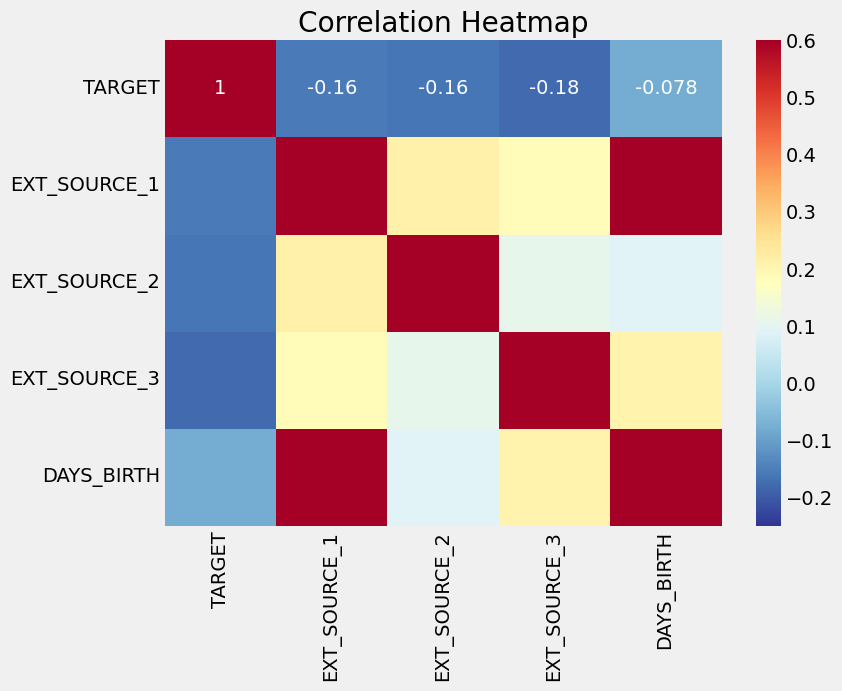

In [ ]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

All three EXT_SOURCE featureshave negative correlations with the target, indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan. We can also see that DAYS_BIRTH is positively correlated with EXT_SOURCE_1 indicating that maybe one of the factors in this score is the client age.

Next we can look at the distribution of each of these features colored by the value of the target. This will let us visualize the effect of this variable on the target.

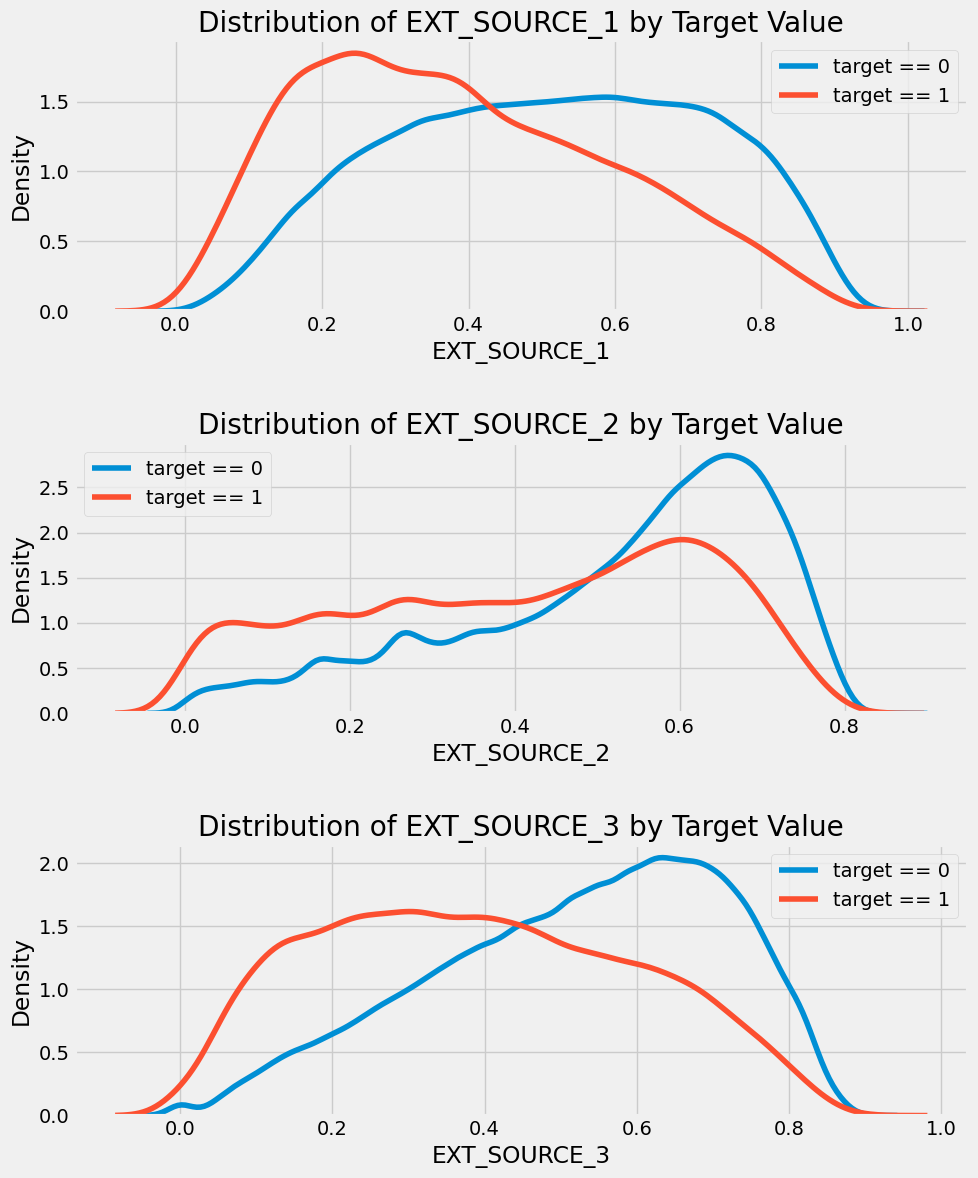

In [ ]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):

    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')

    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    plt.legend()

plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_3 displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan. The relationship is not very strong (in fact they are all considered very weak, but these variables will still be useful for a machine learning model to predict whether or not an applicant will repay a loan on time.

### Pairs Plot

erreur voir https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook

In [ ]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET',
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

TypeError: PairGrid.__init__() got an unexpected keyword argument 'size'

## Analyse exploratoire fichiers annexes

### bureau.csv

In [ ]:
bureau = pd.read_csv(path + 'bureau.csv')
print('bureau data shape: ', bureau.shape)
bureau.head()

bureau data shape:  (1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [ ]:
getInfosOnColumns(bureau)

,Columns,Types,Values,Uniques,Uniques(no nulls),Missing(n),Missing(%)
0,SK_ID_CURR,int64,"[215354, 162297, 402440, 238881, 222183, 42615...",305811,305811,0,0.0
0,SK_ID_BUREAU,int64,"[5714462, 5714463, 5714464, 5714465, 5714466, ...",1716428,1716428,0,0.0
0,CREDIT_ACTIVE,object,"[Closed, Active, Sold, Bad debt]",4,4,0,0.0
0,CREDIT_CURRENCY,object,"[currency 1, currency 2, currency 4, currency 3]",4,4,0,0.0
0,DAYS_CREDIT,int64,"[-497, -208, -203, -629, -273, -43, -1896, -11...",2923,2923,0,0.0
0,CREDIT_DAY_OVERDUE,int64,"[0, 2603, 6, 30, 2156, 496, 186, 2264, 41, 8, ...",942,942,0,0.0
0,DAYS_CREDIT_ENDDATE,float64,"[-153.0, 1075.0, 528.0, nan, 1197.0, 27460.0, ...",14097,14096,105553,6.1
0,DAYS_ENDDATE_FACT,float64,"[-153.0, nan, -1710.0, -840.0, -825.0, -187.0,...",2918,2917,633653,36.9
0,AMT_CREDIT_MAX_OVERDUE,float64,"[nan, 77674.5, 0.0, 14985.0, 310.5, 20493.27, ...",68252,68251,1124488,65.5
0,CNT_CREDIT_PROLONG,int64,"[0, 2, 1, 4, 3, 5, 9, 8, 6, 7]",10,10,0,0.0


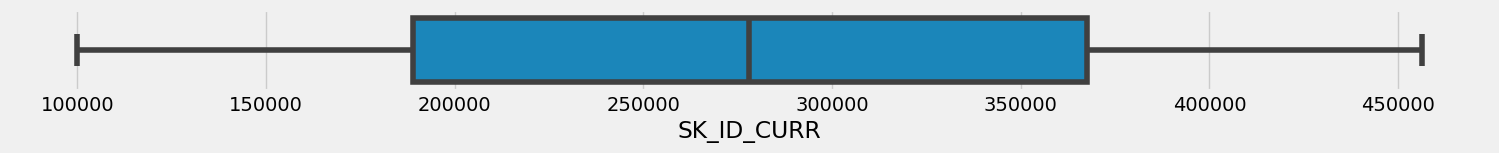

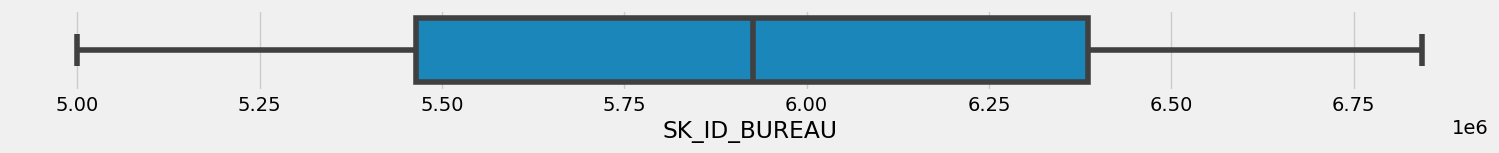

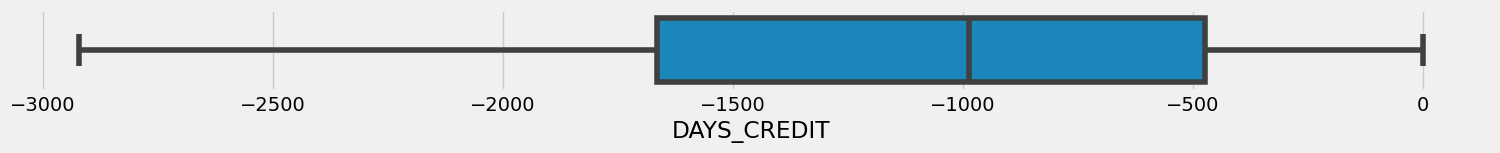

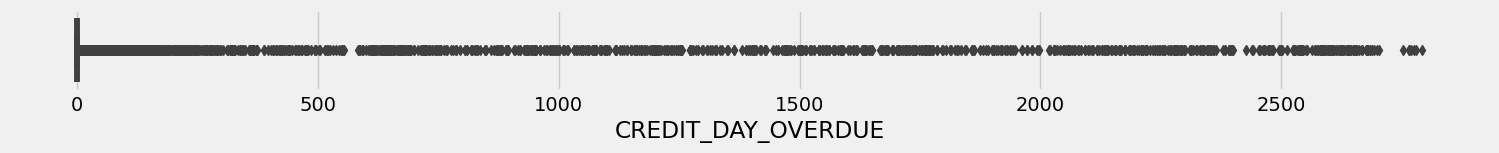

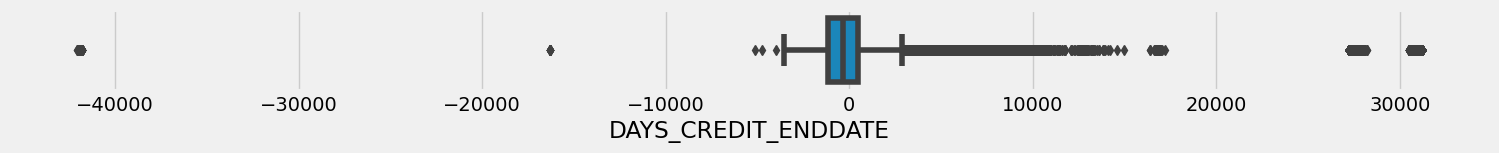

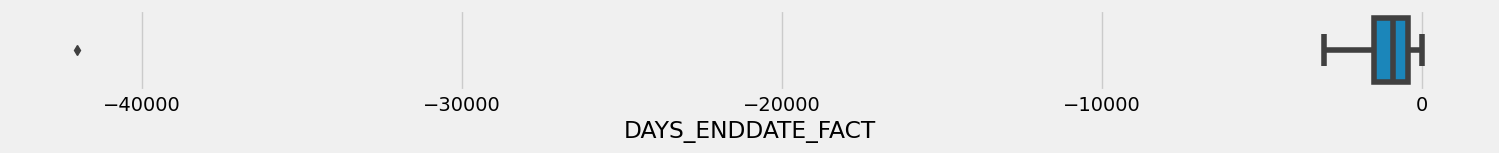

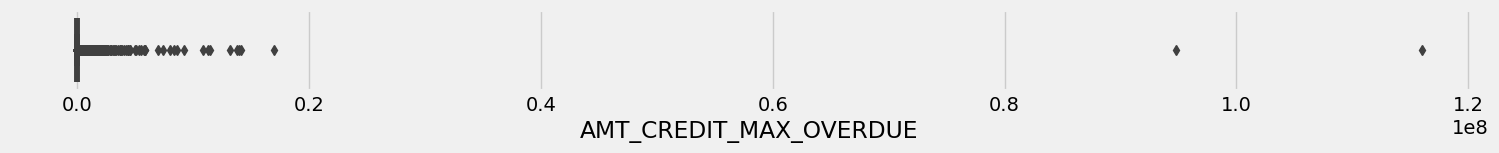

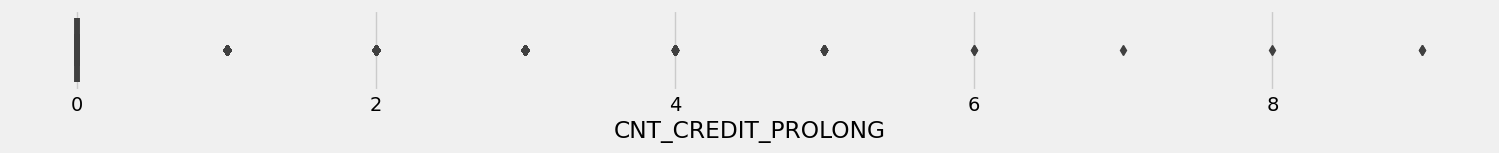

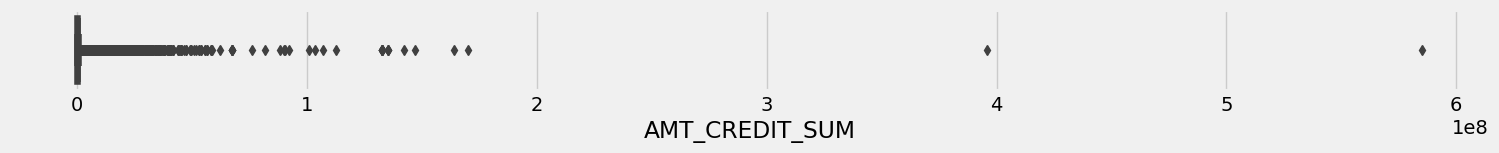

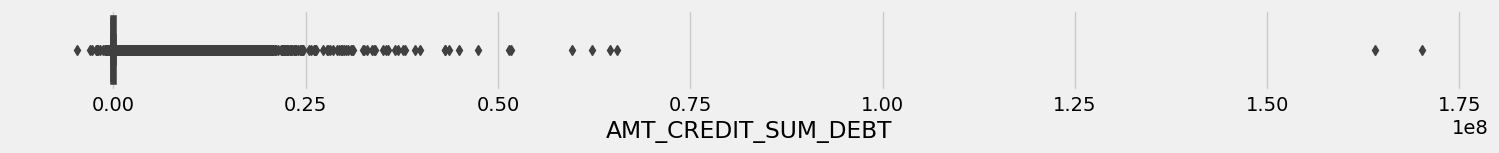

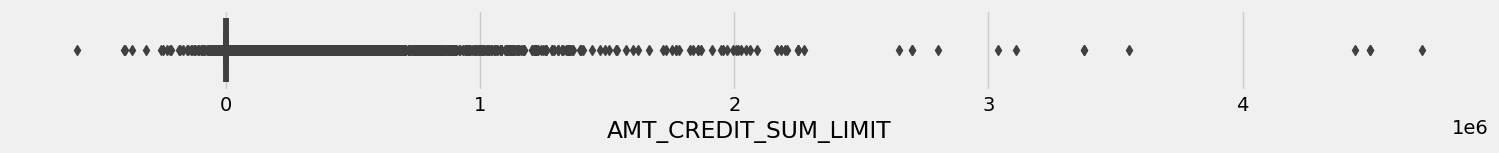

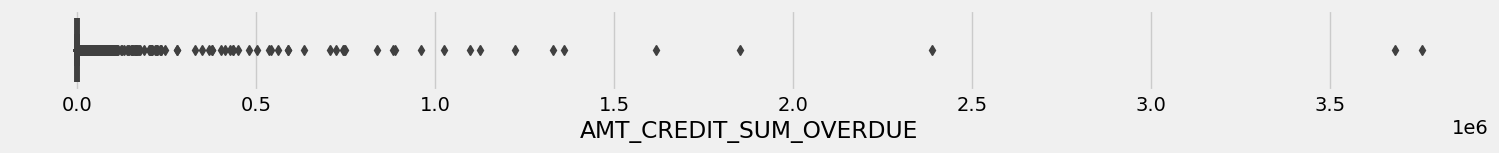

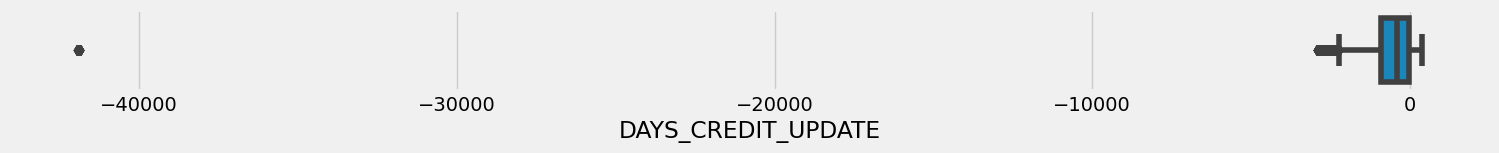

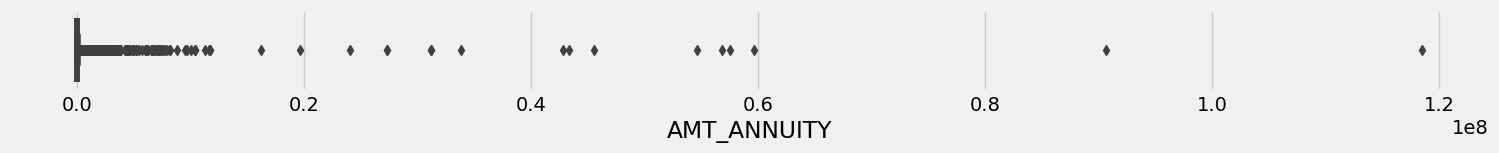

In [ ]:
boxPlotsNumColumns(bureau)

### bureau_balance.csv

In [ ]:
bureau_balance = pd.read_csv(path + 'bureau_balance.csv')
print('bureau_balance data shape: ', bureau_balance.shape)
bureau_balance.head()

bureau_balance data shape:  (27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [ ]:
getInfosOnColumns(bureau_balance)

,Columns,Types,Values,Uniques,Uniques(no nulls),Missing(n),Missing(%)
0,SK_ID_BUREAU,int64,"[5715448, 5715449, 5715451, 5715452, 5715453, ...",817395,817395,0,0.0
0,MONTHS_BALANCE,int64,"[0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -...",97,97,0,0.0
0,STATUS,object,"[C, 0, X, 1, 2, 3, 5, 4]",8,8,0,0.0


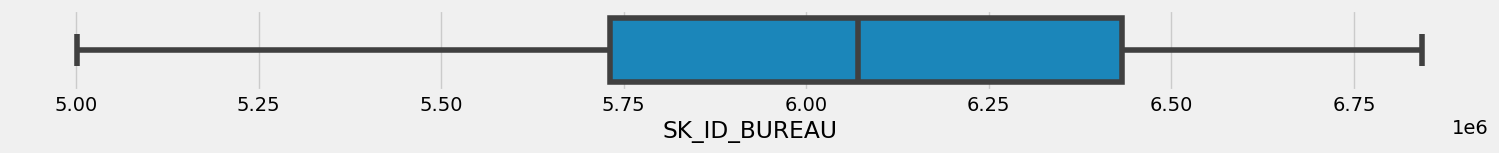

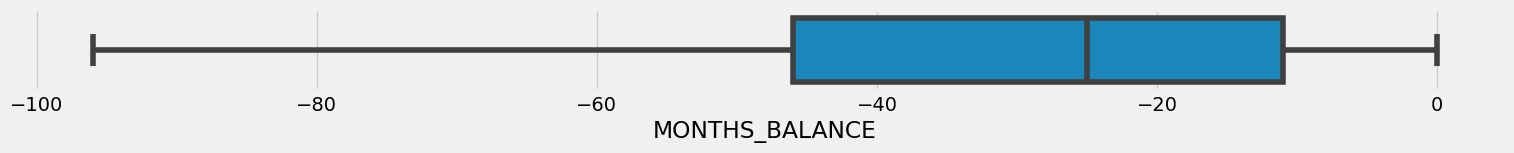

In [ ]:
boxPlotsNumColumns(bureau_balance)

# Choix de kernel kaggle:

le kernel https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features est choisi pour son feature engineering avancé

- Most features are created by applying min, max, mean, sum and var functions to grouped tables.
- Little feature selection is done and overfitting might be a problem since many features are related.
- The following key ideas were used:
 - Variables métier :Divide or subtract important features to get rates (like annuity and income)
 - In Bureau Data: create specific features for Active credits and Closed credits
 - In Previous Applications: create specific features for Approved and Refused applications
 - Modularity: one function for each table (except bureau_balance)
 - One-hot encoding for categorical features
- All tables are joined with the application DF using the SK_ID_CURR key (except bureau_balance).
- You can use LightGBM with KFold or Stratified KFold.

In [ ]:
pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.3 MB 1.7 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.3 MB 6.6 MB/s eta 0:00:01
   ------------------------------------- -- 1.3/1.3 MB 8.9 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## fonctions communes

In [ ]:

[col for col in df.columns if df[col].dtype == 'object']

['CC_NAME_CONTRACT_STATUS_Active_MIN',
 'CC_NAME_CONTRACT_STATUS_Active_MAX',
 'CC_NAME_CONTRACT_STATUS_Completed_MIN',
 'CC_NAME_CONTRACT_STATUS_Completed_MAX',
 'CC_NAME_CONTRACT_STATUS_Demand_MIN',
 'CC_NAME_CONTRACT_STATUS_Demand_MAX',
 'CC_NAME_CONTRACT_STATUS_Sent proposal_MIN',
 'CC_NAME_CONTRACT_STATUS_Sent proposal_MAX',
 'CC_NAME_CONTRACT_STATUS_Signed_MIN',
 'CC_NAME_CONTRACT_STATUS_Signed_MAX',
 'CC_NAME_CONTRACT_STATUS_nan_MIN',
 'CC_NAME_CONTRACT_STATUS_nan_MAX']

In [4]:
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

def one_hot_encoder(df, nan_as_category = True):
    '''One-hot encoding for categorical columns with get_dummies'''
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns


def encode_variables_qualitatives(df, nan_as_category = True):
    '''Categorical features with Binary encode (0 or 1; two categories)'''
    original_columns = list(df.columns)
    categorical_columns_2values = [col for col in df.columns if df[col].dtype == 'object' and len(df[col].unique())<= 2]
    for bin_feature in categorical_columns_2values:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
        print(uniques)
    df, new_columns = one_hot_encoder(df, nan_as_category)
    return df, new_columns


## fichier principal application_train.csv

 variables catégorielles
- si pas plus de valeurs différentes : utilisation de pandas.factorize (ou LabelEncoder équivalent)
- si plus de 2 valeurs : one-hot encoding

In [ ]:
# Number of unique classes in each object column
print(app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0))
print(app_train['FLAG_OWN_CAR'].value_counts())

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64


In [5]:
# Preprocess application_train.csv and application_test.csv
def application(df, num_rows = None, nan_as_category = False):

    print("samples: {}".format(len(df)))
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']

    # Categorical features with Binary encode (0 or 1; two categories)
    #for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
    #    df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Categorical features with One-Hot encode
    df, cat_cols = encode_variables_qualitatives(df, nan_as_category)

    # outlier 365243 (> 1000 ans) NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, np.nan)
    # Variables métier - Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

    gc.collect()
    return df


In [ ]:
path

'C:/Users/erwan/openclassroomsRessources/projet7/Projet+Mise+en+prod+-+home-credit-default-risk/'

In [ ]:
pd.read_csv(path + 'application_train.csv')

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
82,82,100097,0,Cash loans,M,Y,Y,0,157500.0,760225.5,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
83,83,100098,0,Revolving loans,M,Y,N,0,225000.0,270000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
84,84,100099,0,Cash loans,F,N,Y,0,360000.0,733315.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


## fichiers bureau.csv et bureau_balance.csv

In [ ]:
bureau = pd.read_csv(path + 'bureau.csv')
#print(bureau.select_dtypes('object').apply(pd.Series.nunique, axis = 0))

In [ ]:
#bureau[bureau['SK_ID_CURR']==215354].to_csv('bureau_reduced.csv')
bureau_4tests = bureau[(bureau['SK_ID_CURR']>100001) & (bureau['SK_ID_CURR']<100012)]
bureau_4tests.to_csv("bureau_4tests.csv")

In [ ]:
bureau_4tests

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
363104,100004,6829133,Closed,currency 1,-1326,0,-595.0,-683.0,NaN,0,94500.000,0.0,0.000,0.0,Consumer credit,-682,NaN
363105,100004,6829134,Closed,currency 1,-408,0,-382.0,-382.0,0.000,0,94537.800,0.0,0.000,0.0,Consumer credit,-382,NaN
675684,100002,6158904,Closed,currency 1,-1125,0,-1038.0,-1038.0,NaN,0,40761.000,NaN,NaN,0.0,Credit card,-1038,0.0
675685,100002,6158905,Closed,currency 1,-476,0,NaN,-48.0,NaN,0,0.000,0.0,NaN,0.0,Credit card,-47,NaN
675686,100002,6158906,Closed,currency 1,-1437,0,-1072.0,-1185.0,0.000,0,135000.000,0.0,0.000,0.0,Consumer credit,-1185,0.0
675687,100002,6158907,Closed,currency 1,-1121,0,-911.0,-911.0,3321.000,0,19071.000,NaN,NaN,0.0,Consumer credit,-906,0.0
675688,100002,6158908,Closed,currency 1,-645,0,85.0,-36.0,5043.645,0,120735.000,0.0,0.000,0.0,Consumer credit,-34,0.0
675689,100002,6158909,Active,currency 1,-103,0,NaN,NaN,40.500,0,31988.565,0.0,31988.565,0.0,Credit card,-24,0.0
1024666,100003,5885877,Closed,currency 1,-2586,0,-2434.0,-2131.0,0.000,0,22248.000,0.0,0.000,0.0,Consumer credit,-2131,NaN
1024667,100003,5885878,Closed,currency 1,-1636,0,-540.0,-540.0,0.000,0,112500.000,0.0,0.000,0.0,Credit card,-540,NaN


In [ ]:
bureau_4deployment = bureau[(bureau['SK_ID_CURR']>100000) & (bureau['SK_ID_CURR']<100101)]
bureau_4deployment.to_csv("bureau_production.csv")

df[df['team'].isin(['A', 'B', 'D'])]

In [ ]:
bb = pd.read_csv(path + 'bureau_balance.csv')
print(bb.select_dtypes('object').apply(pd.Series.nunique, axis = 0))


STATUS    6
dtype: int64


In [ ]:
bb_4tests = bb[bb['SK_ID_BUREAU'].isin(bureau_4tests['SK_ID_BUREAU'].unique())]
bb_4tests.to_csv("bureau_balance_4tests.csv")

In [ ]:
bb_4deployment = bb[bb['SK_ID_BUREAU'].isin(bureau_4deployment['SK_ID_BUREAU'].unique())]
bb_4deployment.to_csv("bureau_balance_production.csv")

In [ ]:
bb.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [ ]:
bb[bb['SK_ID_BUREAU']==215354].to_csv('bureau_balance_reduced.csv')

In [ ]:
# Preprocess bureau.csv and bureau_balance.csv
def bureau_and_balance(num_rows = None, nan_as_category = True):
    bureau = pd.read_csv(path + 'bureau.csv', nrows = num_rows)
    bb = pd.read_csv(path + 'bureau_balance.csv', nrows = num_rows)
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)

    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()

    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']

    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg

## fichier previous_application.csv

In [ ]:
pa = pd.read_csv(path + 'previous_application.csv')
print(pa.select_dtypes('object').apply(pd.Series.nunique, axis = 0))

NAME_CONTRACT_TYPE              3
WEEKDAY_APPR_PROCESS_START      7
FLAG_LAST_APPL_PER_CONTRACT     2
NAME_CASH_LOAN_PURPOSE         10
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               2
CODE_REJECT_REASON              7
NAME_TYPE_SUITE                 6
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            15
NAME_PORTFOLIO                  4
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    7
NAME_SELLER_INDUSTRY            8
NAME_YIELD_GROUP                5
PRODUCT_COMBINATION            17
dtype: int64


In [ ]:
pa['NAME_CONTRACT_STATUS']

0          Approved
1          Approved
2          Approved
3          Approved
4           Refused
             ...   
1670209    Approved
1670210    Approved
1670211    Approved
1670212    Approved
1670213    Approved
Name: NAME_CONTRACT_STATUS, Length: 1670214, dtype: object

In [ ]:
pa_4tests = pa[(pa['SK_ID_CURR']>100001) & (pa['SK_ID_CURR']<100012)]
pa_4tests.to_csv("previous_application_4tests.csv")

In [ ]:
pa_4deployment = pa[(pa['SK_ID_CURR']>100000) & (pa['SK_ID_CURR']<100101)]
pa_4deployment.to_csv("previous_application_production.csv")

In [ ]:
pa.head()

pa[pa['SK_ID_CURR']==215354].to_csv('previous_application_reduced.csv')

In [ ]:
# Preprocess previous_applications.csv
def previous_applications(num_rows = None, nan_as_category = True):
    prev = pd.read_csv(path + 'previous_application.csv', nrows = num_rows)
    prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
    # gestion Outlier : Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'] = prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan)
    prev['DAYS_FIRST_DUE'] = prev['DAYS_FIRST_DUE'].replace(365243, np.nan)
    prev['DAYS_LAST_DUE_1ST_VERSION'] = prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan)
    prev['DAYS_LAST_DUE'] = prev['DAYS_LAST_DUE'].replace(365243, np.nan)
    prev['DAYS_TERMINATION'] = prev['DAYS_TERMINATION'].replace(365243, np.nan)

    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']

    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg

## fichier POS_CASH_balance.csv

In [ ]:
pc = pd.read_csv(path + 'POS_CASH_balance.csv')
print(pc.select_dtypes('object').apply(pd.Series.nunique, axis = 0))

NAME_CONTRACT_STATUS    4
dtype: int64


In [ ]:
pc_4tests = pc[(pc['SK_ID_CURR']>100001) & (pc['SK_ID_CURR']<100012)]
pc_4tests.to_csv("POS_CASH_balance_4tests.csv")

In [ ]:
pc_4prod = pc[(pc['SK_ID_CURR']>100000) & (pc['SK_ID_CURR']<100101)]
pc_4prod.to_csv("POS_CASH_balance_production.csv")

In [ ]:
pc.head()
pc[pc['SK_ID_CURR']==215354].to_csv('POS_CASH_balance_reduced.csv')

In [ ]:
# Preprocess POS_CASH_balance.csv
def pos_cash(num_rows = None, nan_as_category = True):
    pos = pd.read_csv(path + 'POS_CASH_balance.csv', nrows = num_rows)
    pos, cat_cols = one_hot_encoder(pos, nan_as_category= True)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']

    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg

## fichier installments_payments.csv

In [ ]:
ip = pd.read_csv(path + 'installments_payments.csv')
print(ip.select_dtypes('object').apply(pd.Series.nunique, axis = 0))

Series([], dtype: float64)


In [ ]:
ip_4tests = ip[(ip['SK_ID_CURR']>100001) & (ip['SK_ID_CURR']<100012)]
ip_4tests.to_csv("installments_payments_4tests.csv")

In [ ]:
ip_4prod = ip[(ip['SK_ID_CURR']>100000) & (ip['SK_ID_CURR']<100101)]
ip_4prod.to_csv("installments_payments_production.csv")

In [ ]:
ip.head()

ip[ip['SK_ID_CURR']==215354].to_csv('installments_payments_reduced.csv')

In [ ]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [ ]:
# Preprocess installments_payments.csv
def installments_payments(num_rows = None, nan_as_category = True):
    ins = pd.read_csv(path + 'installments_payments.csv', nrows = num_rows)
    #pas besoin ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)
    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    # pas besoin for cat in cat_cols:
    #    aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg

## fichier credit_card_balance.csv

In [ ]:
cb = pd.read_csv(path + 'credit_card_balance.csv')
#print(cb.select_dtypes('object').apply(pd.Series.nunique, axis = 0))
cb['NAME_CONTRACT_STATUS']

0         Active
1      Completed
2         Active
3         Active
4         Active
         ...    
905       Active
906       Active
907       Active
908       Active
909       Active
Name: NAME_CONTRACT_STATUS, Length: 910, dtype: object

In [ ]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [ ]:
cb_4tests = cb[(cb['SK_ID_CURR']>100001) & (cb['SK_ID_CURR']<100012)]
cb_4tests.to_csv("credit_card_balance_4tests.csv")

In [ ]:
cb_4prod = cb[(cb['SK_ID_CURR']>100000) & (cb['SK_ID_CURR']<100101)]
cb_4prod.to_csv("credit_card_balance_production.csv")

In [ ]:
cb.head()
cb.info()
#cb[cb['SK_ID_CURR']==215354].to_csv('credit_card_balance_reduced.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [ ]:
# Preprocess credit_card_balance.csv
def credit_card_balance(num_rows = None, nan_as_category = True):
    cc = pd.read_csv(path + 'credit_card_balance.csv', nrows = num_rows)
    cc, cat_cols = one_hot_encoder(cc, nan_as_category= True)
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg

In [ ]:
dd = credit_card_balance()
dd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103558 entries, 100006 to 456250
Columns: 141 entries, CC_MONTHS_BALANCE_MIN to CC_COUNT
dtypes: bool(16), float64(101), int64(24)
memory usage: 101.1 MB


## featurePreprocessing

Lance le feature engineering (et filtre de certaines valeurs et mise à nan de certains outliers) sur tous les fichiers pour construire un seul jeu de données à partir de application_train , avec jointure sur 'SK_ID_CURR'

In [13]:
def featurePreprocessing(df, num_rows):
  df = application(df, num_rows)
  with timer("Process bureau and bureau_balance"):
      bureau = bureau_and_balance(num_rows)
      print("Bureau df shape:", bureau.shape)
      df = df.join(bureau, how='left', on='SK_ID_CURR')
      del bureau
      gc.collect()
  with timer("Process previous_applications"):
      prev = previous_applications(num_rows)
      print("Previous applications df shape:", prev.shape)
      df = df.join(prev, how='left', on='SK_ID_CURR')
      del prev
      gc.collect()
  with timer("Process POS-CASH balance"):
      pos = pos_cash(num_rows)
      print("Pos-cash balance df shape:", pos.shape)
      df = df.join(pos, how='left', on='SK_ID_CURR')
      del pos
      gc.collect()
  with timer("Process installments payments"):
      ins = installments_payments(num_rows)
      print("Installments payments df shape:", ins.shape)
      df = df.join(ins, how='left', on='SK_ID_CURR')
      del ins
      gc.collect()
  with timer("Process credit card balance"):
      cc = credit_card_balance(num_rows)
      print("Credit card balance df shape:", cc.shape)
      df = df.join(cc, how='left', on='SK_ID_CURR')
      del cc
      gc.collect()
  return df

In [ ]:
df.shape
#764 features

(10000, 764)

In [ ]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,100002,1,0,0,0,0,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,0,1,0,1,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,1,0,1,0,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,0,1,0,0,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,0,0,0,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
getInfosOnColumns(df)

NameError: name 'getInfosOnColumns' is not defined

In [ ]:
#exemple pour NAME_INCOME_TYPE
#df[df.columns[pd.Series(df.columns).str.startswith('NAME_INCOME_TYPE')]]
pd.set_option('display.max_rows', 20)
getInfosOnColumns(df[df.columns[df.isna().any()]])

#-> imputation nan compliquée et risque de fausser prédictions ( si =0 ou nan ex EXT_source_1 avec 56%nan)

,Columns,Types,Values,Uniques,Uniques(no nulls),Missing(n),Missing(%)
0,AMT_GOODS_PRICE,float64,"[351000.0, 1129500.0, 135000.0, 297000.0, 5130...",365,364,7,0.1
0,DAYS_EMPLOYED,float64,"[-637.0, -1188.0, -225.0, -3039.0, -3038.0, -1...",4281,4280,1774,17.7
0,OWN_CAR_AGE,float64,"[nan, 26.0, 17.0, 8.0, 23.0, 7.0, 14.0, 1.0, 3...",47,46,6662,66.6
0,EXT_SOURCE_1,float64,"[0.0830369673913225, 0.3112673113812225, nan, ...",4318,4317,5647,56.5
0,EXT_SOURCE_2,float64,"[0.2629485927471776, 0.6222457752555098, 0.555...",9291,9290,26,0.3
...,...,...,...,...,...,...,...
0,CC_NAME_CONTRACT_STATUS_nan_MAX,object,"[nan, False]",2,1,9768,97.7
0,CC_NAME_CONTRACT_STATUS_nan_MEAN,float64,"[nan, 0.0]",2,1,9768,97.7
0,CC_NAME_CONTRACT_STATUS_nan_SUM,float64,"[nan, 0.0]",2,1,9768,97.7
0,CC_NAME_CONTRACT_STATUS_nan_VAR,float64,"[nan, 0.0]",2,1,9991,99.9


# Modèles de classification

## Feature engineering

In [8]:
import time
from contextlib import contextmanager
import gc

path_reduced = 'C:/Users/erwan/projet7_modele_scoring/credit_scoring/api/fichiers_csv/'
save_files = True

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

def one_hot_encoder(df, nan_as_category = True):
    '''One-hot encoding for categorical columns with get_dummies'''
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns


def encode_variables_qualitatives(df, nan_as_category = True):
    '''Categorical features with Binary encode (0 or 1; two categories)'''
    original_columns = list(df.columns)
    categorical_columns_2values = [col for col in df.columns if df[col].dtype == 'object' and len(df[col].unique())<= 2]
    for bin_feature in categorical_columns_2values:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
        print(uniques)
    df, new_columns = one_hot_encoder(df, nan_as_category)
    return df, new_columns

# Preprocess application_train.csv and application_test.csv
def application(df, num_rows = None, nan_as_category = False):

    print("samples: {}".format(len(df)))
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']

    # Categorical features with Binary encode (0 or 1; two categories)
    #for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
    #    df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Categorical features with One-Hot encode
    df, cat_cols = encode_variables_qualitatives(df, nan_as_category)

    # outlier 365243 (> 1000 ans) NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, np.nan)
    # Variables métier - Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

    gc.collect()
    return df

# Preprocess bureau.csv and bureau_balance.csv
def bureau_and_balance(num_rows = None, nan_as_category = True):
    bureau = pd.read_csv(path + 'bureau.csv', nrows = num_rows)    
    bb = pd.read_csv(path + 'bureau_balance.csv', nrows = num_rows)
    if save_files:
        bureau.to_csv(path_reduced + 'bureau_production.csv')
        print('bureau_production' + ' saved')
        bb.to_csv(path_reduced + 'bureau_balance_production.csv')
        print('bureau_balance_production' + ' saved')
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)

    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()

    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']

    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg

# Preprocess previous_applications.csv
def previous_applications(num_rows = None, nan_as_category = True):
    prev = pd.read_csv(path + 'previous_application.csv', nrows = num_rows)
    if save_files:
        prev.to_csv(path_reduced + 'previous_application_production.csv')
        print('previous_application_production' + ' saved')
    prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
    # gestion Outlier : Days 365.243 values -> nan
    prev['DAYS_FIRST_DRAWING'] = prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan)
    prev['DAYS_FIRST_DUE'] = prev['DAYS_FIRST_DUE'].replace(365243, np.nan)
    prev['DAYS_LAST_DUE_1ST_VERSION'] = prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan)
    prev['DAYS_LAST_DUE'] = prev['DAYS_LAST_DUE'].replace(365243, np.nan)
    prev['DAYS_TERMINATION'] = prev['DAYS_TERMINATION'].replace(365243, np.nan)

    # Add feature: value ask / value received percentage
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    # Previous applications numeric features
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']

    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg

# Preprocess POS_CASH_balance.csv
def pos_cash(num_rows = None, nan_as_category = True):
    pos = pd.read_csv(path + 'POS_CASH_balance.csv', nrows = num_rows)
    if save_files:
        pos.to_csv(path_reduced + 'POS_CASH_balance_production.csv')
        print('POS_CASH_balance_production' + ' saved')
    pos, cat_cols = one_hot_encoder(pos, nan_as_category= True)
    # Features
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']

    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg

# Preprocess installments_payments.csv
def installments_payments(num_rows = None, nan_as_category = True):
    ins = pd.read_csv(path + 'installments_payments.csv', nrows = num_rows)
    if save_files:
        ins.to_csv(path_reduced + 'installments_payments_production.csv')
        print('installments_payments_production' + ' saved')
    #pas besoin ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)
    # Percentage and difference paid in each installment (amount paid and installment value)
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    # Features: Perform aggregations
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    # pas besoin for cat in cat_cols:
    #    aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg

# Preprocess credit_card_balance.csv
def credit_card_balance(num_rows = None, nan_as_category = True):
    cc = pd.read_csv(path + 'credit_card_balance.csv', nrows = num_rows)
    if save_files:
        cc.to_csv(path_reduced + 'credit_card_balance_production.csv')
        print('credit_card_balance_production' + ' saved')
    cc, cat_cols = one_hot_encoder(cc, nan_as_category= True)
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg

def featurePreprocessing(df, num_rows):
  df = application(df, num_rows)
  with timer("Process bureau and bureau_balance"):
      bureau = bureau_and_balance(num_rows)
      print("Bureau df shape:", bureau.shape)
      df = df.join(bureau, how='left', on='SK_ID_CURR')
      del bureau
      gc.collect()
  with timer("Process previous_applications"):
      prev = previous_applications(num_rows)
      print("Previous applications df shape:", prev.shape)
      df = df.join(prev, how='left', on='SK_ID_CURR')
      del prev
      gc.collect()
  with timer("Process POS-CASH balance"):
      pos = pos_cash(num_rows)
      print("Pos-cash balance df shape:", pos.shape)
      df = df.join(pos, how='left', on='SK_ID_CURR')
      del pos
      gc.collect()
  with timer("Process installments payments"):
      ins = installments_payments(num_rows)
      print("Installments payments df shape:", ins.shape)
      df = df.join(ins, how='left', on='SK_ID_CURR')
      del ins
      gc.collect()
  with timer("Process credit card balance"):
      cc = credit_card_balance(num_rows)
      print("Credit card balance df shape:", cc.shape)
      df = df.join(cc, how='left', on='SK_ID_CURR')
      del cc
      gc.collect()
  return df


## Score métier

La variable Target est positive (=1) lors d'un défaut de crédit.

On veut minimiser les faux négatifs ( défaut de crédit non détecté - mauvais client prédit bon client) et donc avoir maximiser le score recall (=sensitivity)
et les faux positifs (bon client prédit mauvais) donc maximiser le score precision
On suppose que le coût d’un FN est dix fois supérieur au coût d’un FP (crédit accordé et perte en capital + grave que refus crédit à bon client et manque à gagner en marge)

Attention cette minimisation du coût métier doit passer par l’optimisation du seuil qui détermine, à partir d’une probabilité, la classe 0 ou 1 (un “predict” suppose un seuil à 0.5 qui n’est pas forcément l’optimum) -> on fournit un hyperparamètre à la fonction de score

(https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/#:~:text=Taxonomy%20of%20Classifier%20Evaluation%20Metrics%201%20Threshold%20Metrics,separating%20classes.%203%20Probabilistic%20Metrics%20for%20Imbalanced%20Classification)

In [5]:
from sklearn.metrics import fbeta_score, make_scorer

fbeta10_scorer = make_scorer(fbeta_score, beta=10)


In [ ]:
#from sklearn.metrics import precision_score, recall_score,
#
#def mon_score_metier(y_true, y_pred_proba, seuil):
#    """Cherche à minimiser 10 fois plus les FN que les FP """
#    #calcul de la prédiction selon la probabilité et le seuil fourni:
#    y_pred = y_pred_proba >= seuil
#    recall = recall_score(y_true, y_pred, average='binary')
#    #recall 10 fois plus important
#    recall = recall*10
#    precision = precision_score(y_true, y_pred, average='binary')
#    return (recall*precision)
#
#    (estimator, X, y)
#
#
#
#
#def custom_score_func(X_train_scaled, Y_train_scaled):
#    error, M = 0, 0
#    for i in range(0, len(Y_train_scaled)):
#        z = (Y_train_scaled[i] - M)
#        if X_train_scaled[i] > M and Y_train_scaled[i] > M and (X_train_scaled[i] - Y_train_scaled[i]) > 0:
#            error_i = (abs(Y_train_scaled[i] - X_train_scaled[i]))**(2*np.exp(z))
#        if X_train_scaled[i] > M and Y_train_scaled[i] > M and (X_train_scaled[i] - Y_train_scaled[i]) < 0:
#            error_i = -(abs((Y_train_scaled[i] - X_train_scaled[i]))**(2*np.exp(z)))
#        if X_train_scaled[i] > M and Y_train_scaled[i] < M:
#            error_i = -(abs(Y_train_scaled[i] - X_train_scaled[i]))**(2*np.exp(-z))
#    error += error_i
#    return error
#
#
#custom_scorer = make_scorer(custom_loss_func, greater_is_better=True)

## Import et traitement données

In [9]:
from sklearn.model_selection import train_test_split
debug = True
num_rows = 10000 if debug else None
# num_rows = None
#num_rows = None
df = pd.read_csv(path + 'application_train.csv', nrows= num_rows)
if save_files:
        df.to_csv(path_reduced + 'application_train_production.csv')
        print('application_train_production' + ' saved')
print(df.shape)
df = featurePreprocessing(df, num_rows)

X = df.drop(['TARGET','SK_ID_CURR'], axis=1).to_numpy()
y = df['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)

application_train_production saved
(10000, 122)
samples: 10000
Index(['Cash loans', 'Revolving loans'], dtype='object')
Index(['M', 'F'], dtype='object')
Index(['N', 'Y'], dtype='object')
Index(['Y', 'N'], dtype='object')
bureau_production saved
bureau_balance_production saved
Bureau df shape: (2011, 108)
Process bureau and bureau_balance - done in 1s
previous_application_production saved
Previous applications df shape: (9734, 242)
Process previous_applications - done in 1s
POS_CASH_balance_production saved
Pos-cash balance df shape: (9494, 15)
Process POS-CASH balance - done in 0s
installments_payments_production saved
Installments payments df shape: (8893, 26)
Process installments payments - done in 1s
credit_card_balance_production saved
Credit card balance df shape: (9520, 131)
Process credit card balance - done in 1s


In [7]:
X_train.shape

(7000, 762)

In [14]:
df[df.isna()>0]

#df_infos = getInfosOnColumns(df)

#df_infos[df_infos['Missing(n)']>0].shape

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X_train['TARGET'].astype(int).plot.hist();

## Suivi des modèles (MLFlow)

### Start MLFlow local server (to launch on terminal)

In [ ]:
pip install mlflow
mlflow server --host 127.0.0.1 --port 8080

### Connect trainings to the MLFlow server

In [6]:
import mlflow
from mlflow.models import infer_signature
from matplotlib.figure import Figure

# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

# Create a new MLflow Experiment
mlflow.set_experiment("Credit scoring")


def log_trainedModel(params: dict, metrics: dict, title: str, figure:Figure, figure_title: str, trained_model,  X_train ):
    # Start an MLflow run
    with mlflow.start_run():
        # Log the hyperparameters
        mlflow.log_params(params)    
        # Log the loss metric
        mlflow.log_metrics(metrics)
        # Log figure
        mlflow.log_figure(figure, figure_title)
        # Set a tag that we can use to remind ourselves what this run was for
        mlflow.set_tag("Training Info", title)
    
        # Infer the model signature
        signature = infer_signature(X_train, trained_model.predict(X_train))
    
        # Log the model
        model_info = mlflow.sklearn.log_model(
            sk_model=trained_model,
            artifact_path="credit_scoring_models",
            signature=signature,
            input_example=X_train,
            registered_model_name=title,
        )
        #return uri to model
        return model_info.model_uri

In [ ]:
#mlflow 3 - lancer prédictions -résultat (si serevru local) sur http://localhost:8080

# Load the model back for predictions as a generic Python Function model
loaded_model = mlflow.pyfunc.load_model(model_info.model_uri)

predictions = loaded_model.predict(X_test)

In [9]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

def get_roc_curve(y_true, y_pred_proba):
    fig = plt.figure()    
    
    # Assuming you have your true labels (y_true) and predicted probabilities (y_scores)
    # Calculate the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    #auc =  roc_auc_score(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
   #plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    return fig

## DummyClassifier

In [90]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score

dummy_clf = DummyClassifier(strategy='most_frequent', random_state=0)

debut = time.time()
dummy_clf.fit(X_train, y_train)
fin = time.time()

time_fit = fin - debut
print('mean accuracy: ', dummy_clf.score(X_test, y_test))

y_pred_proba = dummy_clf.predict_proba(X_test)[:, 1]
print('roc_auc_score :', roc_auc_score(y_test, y_pred_proba))

debut = time.time()
y_pred = dummy_clf.predict(X_test) 
fin = time.time()
time_predict = fin - debut
print (fbeta_score(y_test, y_pred, beta=10))

print('f_beta10_score :', fbeta10_scorer(dummy_clf, X_test, y_test ))


mean accuracy:  0.9206666666666666
roc_auc_score : 0.5
0.0
f_beta10_score : 0.0


Registered model 'dummy_classifier' already exists. Creating a new version of this model...
2024/06/17 15:29:37 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: dummy_classifier, version 3
Created version '3' of model 'dummy_classifier'.


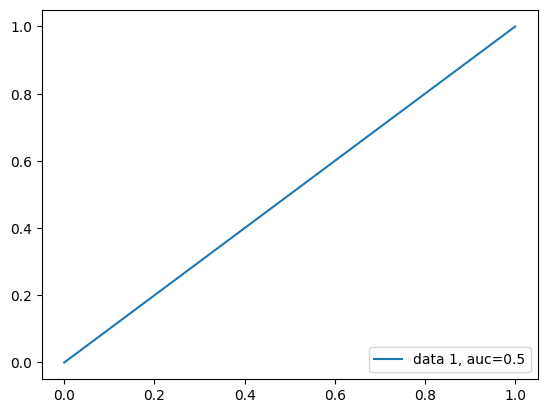

In [107]:
mean_accuracy = dummy_clf.score(X_test, y_test)
roc_auc_sc = roc_auc_score(y_test, dummy_clf.predict_proba(X_test)[:, 1])
score_métier = fbeta10_scorer(dummy_clf, X_test, y_test )

#log to mlflow
params = {
    'strategy':'most_frequent'
}

metrics = {
    'mean accuracy' : mean_accuracy,
    'roc_auc_score' : roc_auc_sc,
    'score métier' : score_métier,
    'temps de traitement d''entraînement' : time_fit,
    'temps de traitement de prédiction' : time_predict
}
fig = get_roc_curve(y_test, y_pred_proba)
dummy_uri = log_trainedModel(params, metrics, 'dummy_classifier', fig, "roc_auc.png", dummy_clf, X_train)

In [ ]:
import pickle

with open("model.pkl", "wb") as f:
pickle.dump(model, f)

## XgBoost

In [ ]:
#pip install xgboost

In [41]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
clf = XGBClassifier()

param_grid = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

scoring = {'accuracy': 'accuracy','roc_auc': 'roc_auc', 'fbeta10': fbeta10_scorer}

gdclf = GridSearchCV(clf, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, scoring=scoring, refit = 'fbeta10')

gdclf.fit(X_train, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [13]:
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', 200)

{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}


Successfully registered model 'xgboost'.
2024/06/17 16:38:03 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: xgboost, version 1
Created version '1' of model 'xgboost'.


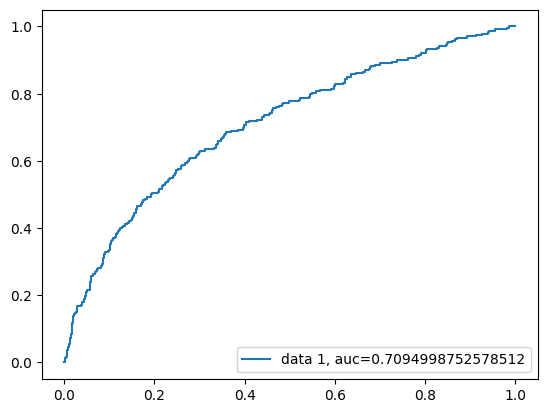

In [113]:
print(gdclf.best_params_)

results = pd.DataFrame(gdclf.cv_results_)
results = results[['params','mean_fit_time', 'mean_score_time', 'mean_test_accuracy', 'mean_test_roc_auc', 'mean_test_fbeta10']]

best_result = results.sort_values(by=['mean_test_fbeta10'], ascending=False).iloc[0,:]

print(best_result['params']) 

metrics = {
    'mean accuracy' : best_result['mean_test_accuracy'],
    'roc_auc_score' : best_result['mean_test_roc_auc'],
    'score métier' : best_result['mean_test_fbeta10'],
    'temps de traitement d\'entraînement' : best_result['mean_fit_time'],
    'temps de traitement de prédiction' : best_result['mean_score_time']
}
y_pred_proba = gdclf.predict_proba(X_test)[:, 1]
fig = get_roc_curve(y_test, y_pred_proba)

xgboost_uri = log_trainedModel(gdclf.best_params_, metrics, 'xgboost', fig, "roc_auc.png", gdclf.best_estimator_, X_train) 

In [ ]:
# case wanted to record diiferent runs of gridsearch in mlflow
#results = pd.DataFrame(best_clf.cv_results_)
## Get params we care about
#results = results[['params','mean_fit_time', 'mean_score_time', 'mean_test_accuracy', 'mean_test_roc_auc', 'mean_test_fbeta10']]
## convert to array for iterating
#results = results.values
#
## Loop through each experiment result and save the results to a
## nested experiement within the experiment
#i = 0
#for some_run in results:
#    i = i + 1 
#    log_trainedModel(params = some_run[0],    
#        metrics = {
#            'mean_fit_time': some_run[1],
#            'mean_score_time': some_run[2],
#            'mean_test_accuracy': some_run[2],
#            'mean_test_roc_auc': some_run[2],
#            'mean_test_fbeta10': some_run[2]
#            },
#        title = 'run_' + i

## Light Gbm (variante de gradient boosting)

In [20]:
#mlflow 1 -- definir modéle , dict params

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Define your parameter grid
param_grid={
    'n_estimators': [1000, 10000]
    , 'max_depth': [2, 8, 16]
    , 'learning_rate': [0.01,0.02]}

#pour kernel kaggle on avait:


model = LGBMClassifier(
            nthread=4,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=34,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.041545473,
            reg_lambda=0.0735294,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            silent=-1,
            verbose=-1, )
          # nthread=4,
          # n_estimators=10000,
          # learning_rate=0.02,
          # num_leaves=34,
          # colsample_bytree=0.9497036,
          # subsample=0.8715623,
          # max_depth=8,
          # reg_alpha=0.041545473,
          # reg_lambda=0.0735294,
          # min_split_gain=0.0222415,
          # min_child_weight=39.3259775,
          # silent=-1,
          # verbose=-1

# Define your scoring functions
#TODO define custom score func
scoring_functions = ['roc_auc_score', '' ]


# Create the GridSearchCV object
#grid_lgbm = GridSearchCV(
#    LGBMClassifier(random_state=0),
#    param_grid,
#    scoring=scoring_functions,
#    cv=5,
#    refit='r2')

# pas de scaling et d'imputing des nan dans le kernel kaggle pipeline = make_pipeline(preprocessor, grid_rfr)


model.fit(X_train, y_train)
#grid_lgbm.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.9497036, learning_rate=0.02, max_depth=8,
               min_child_weight=39.3259775, min_split_gain=0.0222415,
               n_estimators=10000, nthread=4, num_leaves=34,
               reg_alpha=0.041545473, reg_lambda=0.0735294, silent=-1,
               subsample=0.8715623, verbose=-1)

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2762
           1       0.36      0.08      0.14       238

    accuracy                           0.92      3000
   macro avg       0.64      0.54      0.55      3000
weighted avg       0.88      0.92      0.89      3000



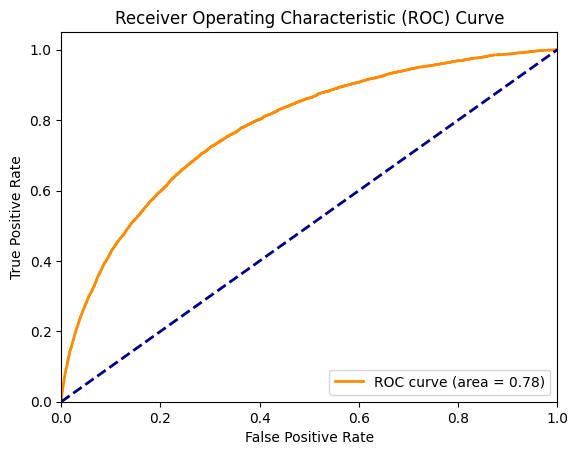

In [98]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[::,1]
# Assuming you have your true labels (y_true) and predicted probabilities (y_scores)
# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
fig  = plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')


In [22]:
#log to mlflow
params = {
    'nthread':4,
    'n_estimators':10000,
    'learning_rate':0.02,
    'num_leaves':34,
    'colsample_bytree':0.9497036,
    'subsample':0.8715623,
    'max_depth':8,
    'reg_alpha':0.041545473,
    'reg_lambda':0.0735294,
    'min_split_gain':0.0222415,
    'min_child_weight':39.3259775,
    'silent':-1,
    'verbose':-1
}

mean_accuracy = model.score(X_test, y_test)
roc_auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
score_métier = fbeta10_scorer(model, X_test, y_test )

metrics = {
    'mean accuracy' : mean_accuracy,
    'roc_auc_score' : roc_auc_score,
    'score métier' : score_métier
}

lightgbm_uri = log_trainedModel(params, metrics, 'lightgbm_kernel' , model, X_train) #fig, 'roc_curve'


2024/06/10 11:22:56 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\erwan\AppData\Local\Temp\tmp5ld8w163\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.4.2', 'cloudpickle==3.0.0']. Set logging level to DEBUG to see the full traceback. 
Successfully registered model 'lightgbm_kernel'.
2024/06/10 11:22:57 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: lightgbm_kernel, version 1
Created version '1' of model 'lightgbm_kernel'.


In [23]:
import pickle

with open("model_lightgbm.pkl", "wb") as f:
    pickle.dump(model, f)

## LightGbm et GridSearchCv 

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

lgbmclf = LGBMClassifier()

# Define your parameter grid
param_grid={
    'n_estimators': [1000, 10000]
    , 'max_depth': [2, 8, 16]
    , 'learning_rate': [0.01,0.02,0.1]
    , 'num_leaves':[20, 34, 90],}

scoring = {'accuracy': 'accuracy','roc_auc': 'roc_auc', 'fbeta10': fbeta10_scorer}

gdlgbm = GridSearchCV(lgbmclf, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, scoring=scoring, refit = 'fbeta10')

gdlgbm.fit(X_train, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[LightGBM] [Info] Number of positive: 537, number of negative: 6463
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040592 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18439
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 660
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.076714 -> initscore=-2.487851
[LightGBM] [Info] Start training from score -2.487851
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.1],
                         'max_depth': [2, 8, 16], 'n_estimators': [1000, 10000],
                         'num_leaves': [20, 34, 90]},
             refit='fbeta10',
             scoring={'accuracy': 'accuracy',
                      'fbeta10': make_scorer(fbeta_score, response_method='predict', beta=10),
                      'roc_auc': 'roc_auc'},
             verbose=True)

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 10000, 'num_leaves': 20}
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 10000, 'num_leaves': 90}


Successfully registered model 'lightgbm_best_via_gridsearchcv'.
2024/06/18 11:00:44 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: lightgbm_best_via_gridsearchcv, version 1
Created version '1' of model 'lightgbm_best_via_gridsearchcv'.


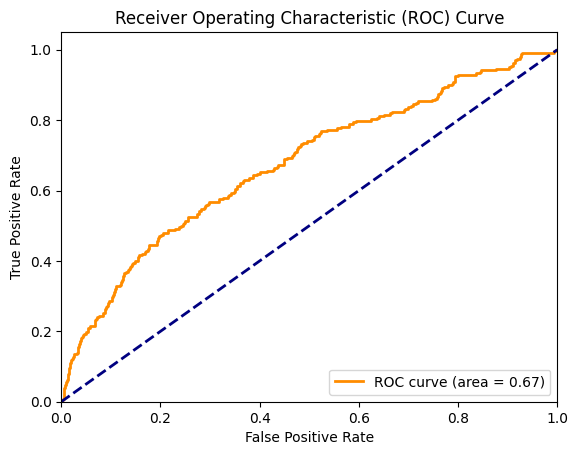

In [15]:
print(gdlgbm.best_params_)

results = pd.DataFrame(gdlgbm.cv_results_)
results = results[['params','mean_fit_time', 'mean_score_time', 'mean_test_accuracy', 'mean_test_roc_auc', 'mean_test_fbeta10']]

best_result = results.sort_values(by=['mean_test_fbeta10'], ascending=False).iloc[0,:]
print(best_result['params']) 

metrics = {
    'mean accuracy' : best_result['mean_test_accuracy'],
    'roc_auc_score' : best_result['mean_test_roc_auc'],
    'score métier' : best_result['mean_test_fbeta10'],
    'temps de traitement - entraînement' : best_result['mean_fit_time'],
    'temps de traitement - prédiction' : best_result['mean_score_time']
}
y_pred_proba = gdlgbm.predict_proba(X_test)[:, 1]
fig = get_roc_curve(y_test, y_pred_proba)

lightgbm_uri = log_trainedModel(gdlgbm.best_params_, metrics, 'lightgbm_best_via_gridsearchcv', fig, "roc_auc.png", gdlgbm.best_estimator_, X_train) 

In [14]:
results = pd.DataFrame(gdlgbm.cv_results_)
results = results[['params','mean_fit_time', 'mean_score_time', 'mean_test_accuracy', 'mean_test_roc_auc', 'mean_test_fbeta10']]

results.sort_values(by=['mean_test_fbeta10'], ascending=False)

,params,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_roc_auc,mean_test_fbeta10
41,"{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 10000, 'num_leaves': 90}",81.677147,1.048801,0.904714,0.669409,0.091799
40,"{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 10000, 'num_leaves': 34}",88.848023,1.026256,0.904714,0.669400,0.091799
39,"{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 10000, 'num_leaves': 20}",73.217515,1.069331,0.904714,0.669395,0.091799
23,"{'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 10000, 'num_leaves': 90}",88.145965,1.315293,0.913286,0.704495,0.056307
22,"{'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 10000, 'num_leaves': 34}",92.068130,1.198428,0.913286,0.704495,0.056307
21,"{'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 10000, 'num_leaves': 20}",59.684910,1.157442,0.913286,0.704495,0.056307
38,"{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000, 'num_leaves': 90}",5.619172,0.199908,0.916714,0.729203,0.054410
36,"{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000, 'num_leaves': 20}",5.508551,0.203366,0.916714,0.729203,0.054410
37,"{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000, 'num_leaves': 34}",5.480142,0.202991,0.916714,0.729203,0.054410
3,"{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 10000, 'num_leaves': 20}",84.472420,1.326745,0.918143,0.728402,0.052522


## Analyse de l'importance des features pour le meilleur modèle

In [18]:
#shap explainer
import shap

model =  gdlgbm.best_estimator_

explainer = shap.TreeExplainer(model)

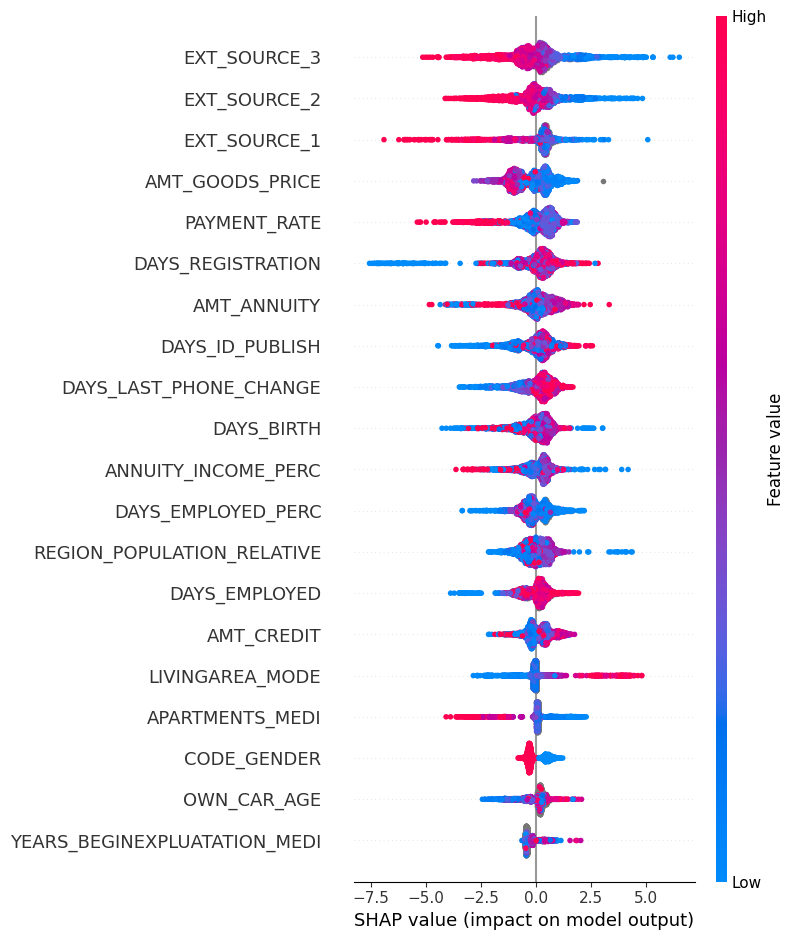

In [33]:
feature_names = df.drop(['TARGET','SK_ID_CURR'], axis=1).columns

#observations_test = pd.DataFrame(X_test, columns= feature_names)

shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names= feature_names)

In [ ]:
#shap.bar_plot(shap_values, X_test, feature_names= feature_names, max_display=10)

### Analyse locale - prêt refusé

In [65]:
X_refused =  df[df['SK_ID_CURR']==100002].drop(['TARGET','SK_ID_CURR'], axis=1).to_numpy()
shap_local_refused_values = explainer(X_refused)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_local_refused_values.values[:,:], X_refused, feature_names= feature_names)

In [75]:
# on constate que les features les plus importantes sont liées au fichier 'application_train.csv'
#app = pd.read_csv(path + 'application_train.csv', nrows = 10)


### Analyse locale - prêt accordé

In [67]:
X_accepted =  df[df['SK_ID_CURR']==100003].drop(['TARGET','SK_ID_CURR'], axis=1).to_numpy()
shap_local_accepted_values = explainer(X_accepted)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_local_accepted_values.values[:,:], X_accepted, feature_names= feature_names)

## Déploiement modèle entraîné

In [ ]:
# model déjà sérialisé par MLFlow , à récupérer dans les artifacts



##pour sérialisation manuelle
import pickle

with open("model_lightgbm.pkl", "wb") as f:
    pickle.dump(model, f)

#import joblib

#joblib.dump(model, 'model_credit.joblib')

In [ ]:
#si on utilisait Déploiement MlFlow

#signature
#from mlflow.models.signature import infer_signature
#signature = infer_signature(X_train, y_train)
#
##sauvegarde modèle
#import mlflow.sklearn
#mlflow.sklearn.save_model(model,  'deploiement_projet_credits\mlflow_model', signature=signature)

#déploiement sous api depuis le terminal associé à votre environnement Python
#mlflow models serve -m deploiement_projet_credits\mlflow_model